In [1]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [2]:
json_file = "A-pex/G2_0_5.json"
j = json.load(open(json_file))

In [3]:
df = pd.json_normalize(j["data"])
df

,map-id,source,target,algorithm,front,norm-front,d-score,norm-d-score,sparsity,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[53, 64.592, 200, 96.5, 201.5], [53, 64.592, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[311.281],[1.73579e-157],0.0,35
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 64.764, 287, 89.5, 230], [54, 64.764, 28...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[387.801],[1.73579e-157],0.0,34
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[25, 31.21, 151, 37.5, 119], [25, 31.21, 151,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[199.918],[1.73579e-157],0.0,34
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[31, 38.866, 196, 46.5, 137.5], [31, 38.866, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[248.91],[1.73579e-157],0.0,34
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[57, 72.318, 295, 102.5, 227.5], [57, 72.318,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[397.198],[1.73579e-157],0.0,34
...,...,...,...,...,...,...,...,...,...,...
2334,resources/dao-map/lak100d.map,21061,8688,Apex,"[[321, 401.316, 1528, 541, 1239.5], [321, 401....","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[2104.26],[1.73579e-157],0.0,380
2335,resources/dao-map/lak100d.map,15863,6372,Apex,"[[219, 281.514, 1028, 379.5, 829.5], [219, 281...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[1419.89],[1.73579e-157],0.0,367
2336,resources/dao-map/lak100d.map,37423,6793,Apex,"[[582, 727.314, 2262, 1034.5, 2183.5], [582, 7...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[3438.34],[1.73579e-157],0.0,372
2337,resources/dao-map/lak100d.map,23394,651,Apex,"[[285, 357.036, 1439, 470, 1101.5], [285, 357....","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[1927.08],[1.73579e-157],0.0,360


In [4]:
fronts = df["front"].tolist()

In [5]:
#front must be a 2d matrix (
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [6]:
hypervolumns = []
for front in fronts:
    hypervolumns.append(front_hv(front))

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [7]:
df.insert(9, "hypervolumn", hypervolumns, True)

In [8]:
df

,map-id,source,target,algorithm,front,norm-front,d-score,norm-d-score,sparsity,hypervolumn,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[53, 64.592, 200, 96.5, 201.5], [53, 64.592, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[311.281],[1.73579e-157],0.0,1.331334e+10,35
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 64.764, 287, 89.5, 230], [54, 64.764, 28...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[387.801],[1.73579e-157],0.0,2.066142e+10,34
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[25, 31.21, 151, 37.5, 119], [25, 31.21, 151,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[199.918],[1.73579e-157],0.0,5.257617e+08,34
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[31, 38.866, 196, 46.5, 137.5], [31, 38.866, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[248.91],[1.73579e-157],0.0,1.509883e+09,34
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[57, 72.318, 295, 102.5, 227.5], [57, 72.318,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[397.198],[1.73579e-157],0.0,2.835623e+10,34
...,...,...,...,...,...,...,...,...,...,...,...
2334,resources/dao-map/lak100d.map,21061,8688,Apex,"[[321, 401.316, 1528, 541, 1239.5], [321, 401....","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[2104.26],[1.73579e-157],0.0,1.319954e+14,380
2335,resources/dao-map/lak100d.map,15863,6372,Apex,"[[219, 281.514, 1028, 379.5, 829.5], [219, 281...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[1419.89],[1.73579e-157],0.0,1.995103e+13,367
2336,resources/dao-map/lak100d.map,37423,6793,Apex,"[[582, 727.314, 2262, 1034.5, 2183.5], [582, 7...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[3438.34],[1.73579e-157],0.0,2.162824e+15,372
2337,resources/dao-map/lak100d.map,23394,651,Apex,"[[285, 357.036, 1439, 470, 1101.5], [285, 357....","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[1927.08],[1.73579e-157],0.0,7.580538e+13,360


In [9]:
# d-score
d_scores = df["d-score"].tolist()
norm_d_scores = df["norm-d-score"].tolist()

In [10]:
avg_d_score = []
avg_norm_d_score = []
for inst in d_scores:
    avg_d_score.append(sum(inst) / len(inst))

for inst in norm_d_scores:
    avg_norm_d_score.append(sum(inst) / len(inst))

In [11]:
df.insert(8, "avg_norm_d_score", avg_norm_d_score, True)
df.insert(7, "avg_d_score", avg_d_score, True)

In [12]:
df

,map-id,source,target,algorithm,front,norm-front,d-score,avg_d_score,norm-d-score,avg_norm_d_score,sparsity,hypervolumn,time
0,resources/dao-map/ost004d.map,4274,937,Apex,"[[53, 64.592, 200, 96.5, 201.5], [53, 64.592, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[311.281],311.281,[1.73579e-157],1.735790e-157,0.0,1.331334e+10,35
1,resources/dao-map/ost004d.map,3111,3309,Apex,"[[54, 64.764, 287, 89.5, 230], [54, 64.764, 28...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[387.801],387.801,[1.73579e-157],1.735790e-157,0.0,2.066142e+10,34
2,resources/dao-map/ost004d.map,3366,4402,Apex,"[[25, 31.21, 151, 37.5, 119], [25, 31.21, 151,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[199.918],199.918,[1.73579e-157],1.735790e-157,0.0,5.257617e+08,34
3,resources/dao-map/ost004d.map,4151,4286,Apex,"[[31, 38.866, 196, 46.5, 137.5], [31, 38.866, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[248.91],248.910,[1.73579e-157],1.735790e-157,0.0,1.509883e+09,34
4,resources/dao-map/ost004d.map,3615,497,Apex,"[[57, 72.318, 295, 102.5, 227.5], [57, 72.318,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[397.198],397.198,[1.73579e-157],1.735790e-157,0.0,2.835623e+10,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,resources/dao-map/lak100d.map,21061,8688,Apex,"[[321, 401.316, 1528, 541, 1239.5], [321, 401....","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[2104.26],2104.260,[1.73579e-157],1.735790e-157,0.0,1.319954e+14,380
2335,resources/dao-map/lak100d.map,15863,6372,Apex,"[[219, 281.514, 1028, 379.5, 829.5], [219, 281...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[1419.89],1419.890,[1.73579e-157],1.735790e-157,0.0,1.995103e+13,367
2336,resources/dao-map/lak100d.map,37423,6793,Apex,"[[582, 727.314, 2262, 1034.5, 2183.5], [582, 7...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[3438.34],3438.340,[1.73579e-157],1.735790e-157,0.0,2.162824e+15,372
2337,resources/dao-map/lak100d.map,23394,651,Apex,"[[285, 357.036, 1439, 470, 1101.5], [285, 357....","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]",[1927.08],1927.080,[1.73579e-157],1.735790e-157,0.0,7.580538e+13,360


In [13]:
#
# Sparisty
#

In [14]:
avg_map_sparsity = []
maps = df["map-id"].unique()
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["sparsity"])
    avg_map_sparsity.extend(map_df.mean(axis=0).tolist())

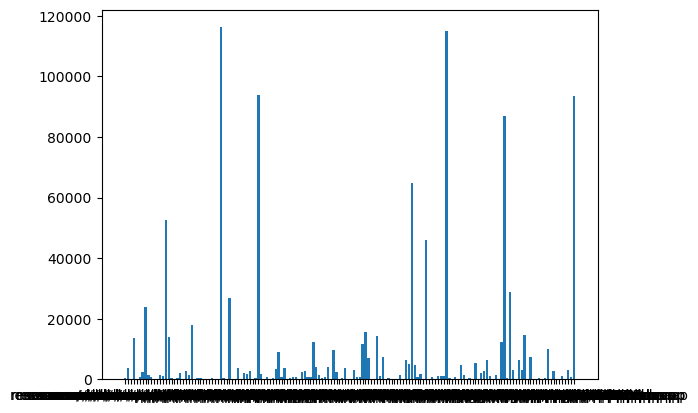

In [15]:
plt.bar(maps, avg_map_sparsity)
plt.show()

In [16]:
#overall sparsity
s_df = df.filter(["sparsity"])
overall_sparsity = s_df.mean(axis=0)
print("Sparsity"
print("map avg min: ", min(avg_map_sparsity))
print("map avg max: ", max(avg_map_sparsity))
print("overall avg: ", overall_sparsity[0])

SyntaxError: '(' was never closed (410013140.py, line 4)

In [17]:
prev_min = 3.5372475333333333
prev_max = 164.79837266666664
prev_overall = 21.819947549415993
print("Min percentage change: ", (min(avg_map_sparsity) - prev_min) / prev_min)
print("Max percentage change: ", (max(avg_map_sparsity) - prev_max) / prev_max)

print("Overall percentage change: ",  (overall_sparsity[0]- prev_overall) / prev_overall)

Min percentage change:  -1.0
Max percentage change:  704.1346287768158


NameError: name 'overall_sparsity' is not defined

In [18]:
#
# Hypervolume
# 

In [19]:
# front must be a 2d matrix (?)
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [20]:
def map_avg_HV(df):
    map_avg_HV = []
    maps = df['map-id'].unique()
    for MAP in maps:
        map_df = df[df['map-id'] == MAP]
        fronts = map_df.filter(["front"])
        HVs = []
        for index, row in fronts.iterrows():
            HVs.append(front_hv(row.tolist()[0]))
            
        map_avg_HV.append(np.array(HVs).mean())
        
    return map_avg_HV

In [21]:
# calculate the overall average generational hypervolume
HVs = []
fronts = df.filter(["front"])
for index, row in fronts.iterrows():
    HVs.append(front_hv(row.tolist()[0]))

overall_HV = np.array(HVs).mean()

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [22]:
map_HV = map_avg_HV(df)


----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [23]:
print("Hypervolume:")
print("map HV avg min: ", min(map_HV))
print("map HV avg max: ", max(map_HV))
print("overall HV avg: ", overall_HV)

Hypervolume:
map HV avg min:  16311424.475666672
map HV avg max:  4.92606664767396e+17
overall HV avg:  3704083196509584.5


In [24]:
prev_min = 29655959.305400003
prev_max = 4858255212212103.0
prev_overall = 126312878037716.27

print("Min percentage change: ", (min(map_HV) - prev_min) / prev_min)
print("Max percentage change: ", (max(map_HV) - prev_max) / prev_max)
print("Overall percentage change: ",  (overall_HV - prev_overall) / prev_overall)

Min percentage change:  -0.44997818793551714
Max percentage change:  100.39579813121799
Overall percentage change:  28.324667872768817


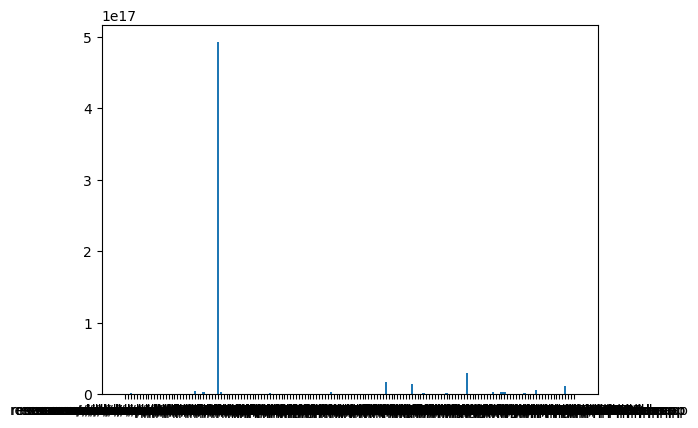

In [25]:
plt.bar(maps, map_HV)
plt.show()

In [26]:
#
# Run time
#

In [27]:
run_times = df["time"].tolist()

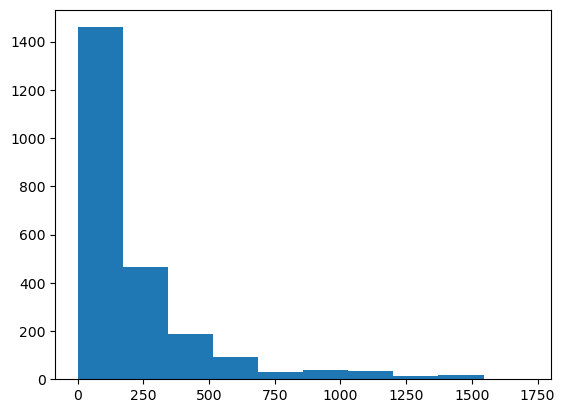

In [28]:
plt.hist(run_times)
plt.show()
#bad data?